<a href="https://colab.research.google.com/github/krixstin/Classification-of-Movie-Reviews-with-Latent-Semantic-Analysis-Using-SVD/blob/main/MA544_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Upload

1. Import "Rotten Tomoates Movie Critics & Reviews" from Kaggle

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
# import from Google Drive
drive.mount('/content/drive')

movies = pd.read_csv("/content/drive/MyDrive/MA544 - Final Project (LSA of NLP)/rotten_tomatoes_movies.csv", encoding= 'unicode_escape')
reviews = pd.read_csv("/content/drive/MyDrive/MA544 - Final Project (LSA of NLP)/rotten_tomatoes_critic_reviews.csv", encoding= 'unicode_escape')
movies.head(20)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.00000,149.00000,Spilled,53.00000,254421.00000,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.00000,142.00000,Upright,64.00000,11574.00000,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.00000,24.00000,Spilled,53.00000,14684.00000,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.00000,54.00000,Upright,97.00000,105386.00000,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.00000,27.00000,Upright,74.00000,68918.00000,5,24,3
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,Warner Bros. Pictures,Rotten,8.00000,149.00000,Spilled,37.00000,411140.00000,37,12,137
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...","Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,...,Gaumont British Distributors,Certified-Fresh,96.00000,51.00000,Upright,86.00000,23890.00000,8,49,2
7,m/1000123-310_to_yuma,3:10 to Yuma,"Dan Evans (Van Heflin), a drought-plagued Ariz...",NaN,NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,...,Columbia Pictures,Fresh,96.00000,28.00000,Upright,79.00000,9243.00000,6,27,1
8,m/10002008-charly,Charly (A Heartbeat Away),"Cultural differences, past loves and personal ...",NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,...,Excel Entertainment,Rotten,20.00000,10.00000,Upright,87.00000,4819.00000,0,2,8
9,m/1000204-abraham_lincoln,Abraham Lincoln,The 16th U.S. president (Walter Huston) is por...,NaN,NR,"Classics, Drama",D.W. Griffith,"Gerrit J. Lloyd, Stephen Vincent BenÃ©t","Walter Huston, Una Merkel, Kay Hammond, Ian Ke...",1930-11-08,...,United Artists,Fresh,82.00000,11.00000,Spilled,40.00000,457.00000,4,9,2


## Data Explore
1. 21 columns of features

2. 17712 rows of movies

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [ ]:
movies.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.00000,17668.00000,17668.00000,17416.00000,17415.00000,17712.00000,17712.00000,17712.00000
mean,102.21405,60.88476,57.13980,60.55426,143940.06833,14.58633,36.37483,20.70314
std,18.70251,28.44335,68.37005,20.54337,1763577.42145,15.14635,52.60104,30.24844
min,5.00000,0.00000,5.00000,0.00000,5.00000,0.00000,0.00000,0.00000
25%,90.00000,38.00000,12.00000,45.00000,707.50000,3.00000,6.00000,3.00000
50%,99.00000,67.00000,28.00000,63.00000,4277.00000,8.00000,16.00000,8.00000
75%,111.00000,86.00000,75.00000,78.00000,24988.00000,23.00000,44.00000,24.00000
max,266.00000,100.00000,574.00000,100.00000,35797635.00000,69.00000,497.00000,303.00000


In [ ]:
movies["genres"].unique()

array(['Action & Adventure, Comedy, Drama, Science Fiction & Fantasy',
       'Comedy', 'Comedy, Romance', ...,
       'Animation, Art House & International, Drama, Science Fiction & Fantasy, Romance',
       'Art House & International, Romance',
       'Action & Adventure, Drama, Horror, Kids & Family, Mystery & Suspense'],
      dtype=object)

In [ ]:
movies.head(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.00000,149.00000,Spilled,53.00000,254421.00000,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.00000,142.00000,Upright,64.00000,11574.00000,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.00000,24.00000,Spilled,53.00000,14684.00000,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.00000,54.00000,Upright,97.00000,105386.00000,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.00000,27.00000,Upright,74.00000,68918.00000,5,24,3
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,Warner Bros. Pictures,Rotten,8.00000,149.00000,Spilled,37.00000,411140.00000,37,12,137
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...","Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,...,Gaumont British Distributors,Certified-Fresh,96.00000,51.00000,Upright,86.00000,23890.00000,8,49,2
7,m/1000123-310_to_yuma,3:10 to Yuma,"Dan Evans (Van Heflin), a drought-plagued Ariz...",NaN,NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,...,Columbia Pictures,Fresh,96.00000,28.00000,Upright,79.00000,9243.00000,6,27,1
8,m/10002008-charly,Charly (A Heartbeat Away),"Cultural differences, past loves and personal ...",NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,...,Excel Entertainment,Rotten,20.00000,10.00000,Upright,87.00000,4819.00000,0,2,8
9,m/1000204-abraham_lincoln,Abraham Lincoln,The 16th U.S. president (Walter Huston) is por...,NaN,NR,"Classics, Drama",D.W. Griffith,"Gerrit J. Lloyd, Stephen Vincent BenÃ©t","Walter Huston, Una Merkel, Kay Hammond, Ian Ke...",1930-11-08,...,United Artists,Fresh,82.00000,11.00000,Spilled,40.00000,457.00000,4,9,2


In [ ]:
movies.loc[movies["genres"]=="Action"]

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count


In [ ]:
movies_action= movies[movies['genres'].str.contains('Action', na=False)]
movies_action.head(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.00000,149.00000,Spilled,53.00000,254421.00000,43,73,76
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.00000,27.00000,Upright,74.00000,68918.00000,5,24,3
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,Warner Bros. Pictures,Rotten,8.00000,149.00000,Spilled,37.00000,411140.00000,37,12,137
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...","Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,...,Gaumont British Distributors,Certified-Fresh,96.00000,51.00000,Upright,86.00000,23890.00000,8,49,2
18,m/1000334-adventures_of_mark_twain,The Adventures of Mark Twain,"In this claymation film, celebrated author Mar...",NaN,G,"Action & Adventure, Animation, Kids & Family",Will Vinton,Susan Shadburne,"James Whitmore, Michele Mariana, Gary Krug, Ch...",1985-03-01,...,Eureka Entertainment Ltd,Fresh,80.00000,5.00000,Upright,82.00000,1046.00000,1,4,1
20,m/1000355-adventures_of_robin_hood,The Adventures of Robin Hood,"When King Richard the Lionheart is captured, h...",Errol Flynn thrills as the legendary title cha...,PG,"Action & Adventure, Classics, Romance","Michael Curtiz, William Keighley","Norman Reilly Raine, Seton I. Miller, Michael ...","Errol Flynn, Olivia de Havilland, Basil Rathbo...",1938-05-14,...,Warner Bros.,Certified-Fresh,100.00000,48.00000,Upright,89.00000,33946.00000,8,48,0
28,m/10004288-running_scared,Running Scared,Mafia flunky Joey Gazelle (Paul Walker) is ord...,This film runs with frenetic energy punctuated...,R,"Action & Adventure, Drama, Mystery & Suspense",Wayne Kramer,Wayne Kramer,"Paul Walker, Cameron Bright, Vera Farmiga, Kar...",2006-02-24,...,New Line Cinema,Rotten,41.00000,131.00000,Upright,79.00000,135400.00000,39,54,77
30,m/10004504-ultraviolet,Ultraviolet,"In the late 21st-century, a vampiric disease m...",An incomprehensible and forgettable sci-fi thr...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",2006-03-03,...,Sony Pictures,Rotten,8.00000,83.00000,Spilled,30.00000,279994.00000,21,7,76
31,m/10004635-home_of_the_brave,Home of the Brave,"In 1965, Klansmen murder a civil-rights worker...",NaN,R,"Action & Adventure, Documentary, Drama, Specia...",Paola di Florio,Paola di Florio,"Mary Liuzzo, Tony Liuzzo, Sally Liuzzo, Penny ...",2004-05-11,...,Emerging Pictures,Fresh,93.00000,15.00000,Spilled,48.00000,866.00000,7,14,1
37,m/10004925-matador,The Matador,Salesman Danny Wright (Greg Kinnear) is workin...,"This humorously amoral, oddball comic thriller...",R,"Action & Adventure, Comedy, 

In [ ]:
movies_action= movies[movies['genres'].str.contains('Action', na=False)]
movies_action.head(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.00000,149.00000,Spilled,53.00000,254421.00000,43,73,76
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.00000,27.00000,Upright,74.00000,68918.00000,5,24,3
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,Warner Bros. Pictures,Rotten,8.00000,149.00000,Spilled,37.00000,411140.00000,37,12,137
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...","Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,...,Gaumont British Distributors,Certified-Fresh,96.00000,51.00000,Upright,86.00000,23890.00000,8,49,2
18,m/1000334-adventures_of_mark_twain,The Adventures of Mark Twain,"In this claymation film, celebrated author Mar...",NaN,G,"Action & Adventure, Animation, Kids & Family",Will Vinton,Susan Shadburne,"James Whitmore, Michele Mariana, Gary Krug, Ch...",1985-03-01,...,Eureka Entertainment Ltd,Fresh,80.00000,5.00000,Upright,82.00000,1046.00000,1,4,1
20,m/1000355-adventures_of_robin_hood,The Adventures of Robin Hood,"When King Richard the Lionheart is captured, h...",Errol Flynn thrills as the legendary title cha...,PG,"Action & Adventure, Classics, Romance","Michael Curtiz, William Keighley","Norman Reilly Raine, Seton I. Miller, Michael ...","Errol Flynn, Olivia de Havilland, Basil Rathbo...",1938-05-14,...,Warner Bros.,Certified-Fresh,100.00000,48.00000,Upright,89.00000,33946.00000,8,48,0
28,m/10004288-running_scared,Running Scared,Mafia flunky Joey Gazelle (Paul Walker) is ord...,This film runs with frenetic energy punctuated...,R,"Action & Adventure, Drama, Mystery & Suspense",Wayne Kramer,Wayne Kramer,"Paul Walker, Cameron Bright, Vera Farmiga, Kar...",2006-02-24,...,New Line Cinema,Rotten,41.00000,131.00000,Upright,79.00000,135400.00000,39,54,77
30,m/10004504-ultraviolet,Ultraviolet,"In the late 21st-century, a vampiric disease m...",An incomprehensible and forgettable sci-fi thr...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",2006-03-03,...,Sony Pictures,Rotten,8.00000,83.00000,Spilled,30.00000,279994.00000,21,7,76
31,m/10004635-home_of_the_brave,Home of the Brave,"In 1965, Klansmen murder a civil-rights worker...",NaN,R,"Action & Adventure, Documentary, Drama, Specia...",Paola di Florio,Paola di Florio,"Mary Liuzzo, Tony Liuzzo, Sally Liuzzo, Penny ...",2004-05-11,...,Emerging Pictures,Fresh,93.00000,15.00000,Spilled,48.00000,866.00000,7,14,1
37,m/10004925-matador,The Matador,Salesman Danny Wright (Greg Kinnear) is workin...,"This humorously amoral, oddball comic thriller...",R,"Action & Adventure, Comedy, 

In [ ]:
movies_action = movies_action[movies['genres'].str.contains('Action', na=False)]
movies_action.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.00000,149.00000,Spilled,53.00000,254421.00000,43,73,76
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.00000,27.00000,Upright,74.00000,68918.00000,5,24,3
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,Warner Bros. Pictures,Rotten,8.00000,149.00000,Spilled,37.00000,411140.00000,37,12,137
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...","Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,...,Gaumont British Distributors,Certified-Fresh,96.00000,51.00000,Upright,86.00000,23890.00000,8,49,2
18,m/1000334-adventures_of_mark_twain,The Adventures of Mark Twain,"In this claymation film, celebrated author Mar...",NaN,G,"Action & Adventure, Animation, Kids & Family",Will Vinton,Susan Shadburne,"James Whitmore, Michele Mariana, Gary Krug, Ch...",1985-03-01,...,Eureka Entertainment Ltd,Fresh,80.00000,5.00000,Upright,82.00000,1046.00000,1,4,1
20,m/1000355-adventures_of_robin_hood,The Adventures of Robin Hood,"When King Richard the Lionheart is captured, h...",Errol Flynn thrills as the legendary title cha...,PG,"Action & Adventure, Classics, Romance","Michael Curtiz, William Keighley","Norman Reilly Raine, Seton I. Miller, Michael ...","Errol Flynn, Olivia de Havilland, Basil Rathbo...",1938-05-14,...,Warner Bros.,Certified-Fresh,100.00000,48.00000,Upright,89.00000,33946.00000,8,48,0
28,m/10004288-running_scared,Running Scared,Mafia flunky Joey Gazelle (Paul Walker) is ord...,This film runs with frenetic energy punctuated...,R,"Action & Adventure, Drama, Mystery & Suspense",Wayne Kramer,Wayne Kramer,"Paul Walker, Cameron Bright, Vera Farmiga, Kar...",2006-02-24,...,New Line Cinema,Rotten,41.00000,131.00000,Upright,79.00000,135400.00000,39,54,77
30,m/10004504-ultraviolet,Ultraviolet,"In the late 21st-century, a vampiric disease m...",An incomprehensible and forgettable sci-fi thr...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",2006-03-03,...,Sony Pictures,Rotten,8.00000,83.00000,Spilled,30.00000,279994.00000,21,7,76
31,m/10004635-home_of_the_brave,Home of the Brave,"In 1965, Klansmen murder a civil-rights worker...",NaN,R,"Action & Adventure, Documentary, Drama, Specia...",Paola di Florio,Paola di Florio,"Mary Liuzzo, Tony Liuzzo, Sally Liuzzo, Penny ...",2004-05-11,...,Emerging Pictures,Fresh,93.00000,15.00000,Spilled,48.00000,866.00000,7,14,1
37,m/10004925-matador,The Matador,Salesman Danny Wright (Greg Kinnear) is workin...,"This humorously amoral, oddball comic thriller...",R,"Action & Adventure, Comedy, 

In [ ]:
movies_romance= movies[movies['genres'].str.contains('Romance', na=False)]
movies_romance.head(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.00000,24.00000,Spilled,53.00000,14684.00000,2,16,8
8,m/10002008-charly,Charly (A Heartbeat Away),"Cultural differences, past loves and personal ...",NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,...,Excel Entertainment,Rotten,20.00000,10.00000,Upright,87.00000,4819.00000,0,2,8
14,m/1000253-adams_rib,Adam's Rib,A courtroom rivalry finds its way into the hou...,"Matched by Garson Kanin's witty, sophisticated...",NR,"Classics, Comedy, Romance",George Cukor,"Garson Kanin, Ruth Gordon","Spencer Tracy, Katharine Hepburn, Judy Hollida...",1949-11-18,...,MGM Home Entertainment,Fresh,96.00000,28.00000,Upright,86.00000,10563.00000,6,27,1
20,m/1000355-adventures_of_robin_hood,The Adventures of Robin Hood,"When King Richard the Lionheart is captured, h...",Errol Flynn thrills as the legendary title cha...,PG,"Action & Adventure, Classics, Romance","Michael Curtiz, William Keighley","Norman Reilly Raine, Seton I. Miller, Michael ...","Errol Flynn, Olivia de Havilland, Basil Rathbo...",1938-05-14,...,Warner Bros.,Certified-Fresh,100.00000,48.00000,Upright,89.00000,33946.00000,8,48,0
25,m/10004209-tristan_and_isolde,Tristan & Isolde,"After the fall of the Roman Empire, English or...","Competent but somewhat static, Tristan & Isold...",PG-13,"Drama, Science Fiction & Fantasy, Romance",Kevin Reynolds,Dean Georgaris,"James Franco, Sophia Myles, Rufus Sewell, Davi...",2006-01-13,...,20th Century Fox,Rotten,31.00000,121.00000,Upright,71.00000,220956.00000,36,38,83
35,m/10004835-farewell_to_arms,A Farewell To Arms,"Based on the Ernest Hemingway novel, this Worl...",NaN,NR,"Classics, Drama, Romance","Charles Vidor, John Hudson, John Huston",Ben Hecht,"Rock Hudson, Jennifer Jones, Vittorio De Sica,...",1957-12-14,...,Fox,Rotten,0.00000,12.00000,Spilled,37.00000,1460.00000,6,0,12
41,m/10005403-the_baxter,The Baxter,Elliot Sherman (Michael Showalter) has had ter...,"The Baxter is good-natured, but there are simp...",PG-13,"Comedy, Romance",Michael Showalter,Michael Showalter,"Michael Showalter, Elizabeth Banks, Michelle W...",2005-08-26,...,IFC Films,Rotten,32.00000,75.00000,Upright,75.00000,7436.00000,25,24,51
44,m/10005755-g,G,"Summer G (Richard T. Jones), an aspiring rappe...",Race and class struggles come to the Hamptons ...,R,"Drama, Romance",Christopher Scott Cherot,"Charles E. Drew, Christopher Scott Cherot, Cha...","Richard T. Jones, Blair Underwood, Chenoa Maxw...",2005-09-16,...,Slow Hand Cinema,Rotten,24.00000,29.00000,Upright,60.00000,1143.00000,17,7,22
46,m/1000581-alfie,Alfie,"Set in postwar London, ""Alfie"" features Michae...",Anchored by Michael Caine's charmingly droll p...,PG,"Classics, Comedy, Drama, Romance",Lewis Gilbert,Bill Naughton,"Michael Caine, Millicent Martin, Julia Foster,...",1966-08-24,...,Paramount Pictures,Fresh,96.00000,27.00000,Upright,76.00000,14669.00000,6,26,1
79,m/10007893-its_a_boy_girl_thing,It's a Boy Girl Thing,Pretty teen girl Nell (Samaire Armstrong) is e...,NaN,PG-13,"Comedy, Romance",Nick Hurran,Geoff Deane,"Samaire Armstrong, Kevin Zegers, Emily Hampshi...",2006-12-26,...,Anchor Bay Entertainment,Fresh,67.00000,9.00000,Upright,61.00000,30371.00000,0,6,3


In [ ]:
movies_romance_not_action= movies_romance[~movies_romance['genres'].str.contains('Action', na=False)]
movies_romance_not_action.head(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.00000,24.00000,Spilled,53.00000,14684.00000,2,16,8
8,m/10002008-charly,Charly (A Heartbeat Away),"Cultural differences, past loves and personal ...",NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,...,Excel Entertainment,Rotten,20.00000,10.00000,Upright,87.00000,4819.00000,0,2,8
14,m/1000253-adams_rib,Adam's Rib,A courtroom rivalry finds its way into the hou...,"Matched by Garson Kanin's witty, sophisticated...",NR,"Classics, Comedy, Romance",George Cukor,"Garson Kanin, Ruth Gordon","Spencer Tracy, Katharine Hepburn, Judy Hollida...",1949-11-18,...,MGM Home Entertainment,Fresh,96.00000,28.00000,Upright,86.00000,10563.00000,6,27,1
25,m/10004209-tristan_and_isolde,Tristan & Isolde,"After the fall of the Roman Empire, English or...","Competent but somewhat static, Tristan & Isold...",PG-13,"Drama, Science Fiction & Fantasy, Romance",Kevin Reynolds,Dean Georgaris,"James Franco, Sophia Myles, Rufus Sewell, Davi...",2006-01-13,...,20th Century Fox,Rotten,31.00000,121.00000,Upright,71.00000,220956.00000,36,38,83
35,m/10004835-farewell_to_arms,A Farewell To Arms,"Based on the Ernest Hemingway novel, this Worl...",NaN,NR,"Classics, Drama, Romance","Charles Vidor, John Hudson, John Huston",Ben Hecht,"Rock Hudson, Jennifer Jones, Vittorio De Sica,...",1957-12-14,...,Fox,Rotten,0.00000,12.00000,Spilled,37.00000,1460.00000,6,0,12
41,m/10005403-the_baxter,The Baxter,Elliot Sherman (Michael Showalter) has had ter...,"The Baxter is good-natured, but there are simp...",PG-13,"Comedy, Romance",Michael Showalter,Michael Showalter,"Michael Showalter, Elizabeth Banks, Michelle W...",2005-08-26,...,IFC Films,Rotten,32.00000,75.00000,Upright,75.00000,7436.00000,25,24,51
44,m/10005755-g,G,"Summer G (Richard T. Jones), an aspiring rappe...",Race and class struggles come to the Hamptons ...,R,"Drama, Romance",Christopher Scott Cherot,"Charles E. Drew, Christopher Scott Cherot, Cha...","Richard T. Jones, Blair Underwood, Chenoa Maxw...",2005-09-16,...,Slow Hand Cinema,Rotten,24.00000,29.00000,Upright,60.00000,1143.00000,17,7,22
46,m/1000581-alfie,Alfie,"Set in postwar London, ""Alfie"" features Michae...",Anchored by Michael Caine's charmingly droll p...,PG,"Classics, Comedy, Drama, Romance",Lewis Gilbert,Bill Naughton,"Michael Caine, Millicent Martin, Julia Foster,...",1966-08-24,...,Paramount Pictures,Fresh,96.00000,27.00000,Upright,76.00000,14669.00000,6,26,1
79,m/10007893-its_a_boy_girl_thing,It's a Boy Girl Thing,Pretty teen girl Nell (Samaire Armstrong) is e...,NaN,PG-13,"Comedy, Romance",Nick Hurran,Geoff Deane,"Samaire Armstrong, Kevin Zegers, Emily Hampshi...",2006-12-26,...,Anchor Bay Entertainment,Fresh,67.00000,9.00000,Upright,61.00000,30371.00000,0,6,3
121,m/10008748-saawariya,Saawariya,Sparks fly when wandering singer Ranbir Raj (R...,"It's pleasing to the eye, but Saawariya strugg...",PG,"Art House & International, Drama, Musical & Pe...",Sanjay Leela Bhansali,"Prakash Kapadia, Sanjay Leela Bhansali","Ranbir Kapoor, Sonam Kapoor, Salman Khan, Rani...",2007-11-09,...,Sony Pictures,Rotten,38.00000,21.00000,Spilled,46.00000,5828.00000,10,8,13


88 rows of review for "Action" & "Horror" & "Suspense"

In [ ]:
movies_action_= movies[movies['genres'].str.contains("Action", na=False) &movies['genres'].str.contains("Suspense", na=False) & movies['genres'].str.contains("Horror", na=False)]
# movies_action_["genres"].unique()
movies_action_

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
157,m/10009274-priest,Priest,In a society ravaged by centuries of war betwe...,"Sleek and stylish, but those qualities are was...",PG-13,"Action & Adventure, Horror, Mystery & Suspense...",Scott Stewart,"Scott Stewart, Cory Goodman","Paul Bettany, Maggie Q, Cam Gigandet, Lily Col...",2011-05-13,...,Screen Gems/SONY PICTURES,Rotten,15.00000,100.00000,Spilled,46.00000,86623.00000,18,15,85
225,m/10010919-objective,The Objective,Ben Keynes (Jonas Ball) is a CIA agent who is ...,NaN,NR,"Action & Adventure, Horror, Mystery & Suspense...",Daniel Myrick,"Daniel Myrick, Wes Clark, Jr., Mark Patton","Jonas Ball, Chems-Eddine Zinoune, Matthew R. A...",2008-04-24,...,IFC Films,Rotten,33.00000,12.00000,Spilled,32.00000,3690.00000,3,4,8
322,m/1002526-black_sunday,Black Sunday,"Blimp pilot Michael Lander (Bruce Dern), who h...","A smart, tense thriller from director John Fra...",R,"Action & Adventure, Drama, Horror, Mystery & S...",John Frankenheimer,"Ivan Moffat, Kenneth Ross, Ernest Lehman","Robert Shaw, Bruce Dern, Marthe Keller, Fritz ...",1977-03-11,...,Anchor Bay Entertainment,Fresh,69.00000,26.00000,Upright,64.00000,3906.00000,6,18,8
396,m/1005399-dead_heat,Dead Heat,When a dutiful Los Angeles police officer name...,NaN,R,"Action & Adventure, Comedy, Horror, Mystery & ...",Mark Goldblatt,Terry Black,"Joe Piscopo, Treat Williams, Lindsay Frost, Da...",1988-05-06,...,LionsGate Entertainment,Rotten,11.00000,9.00000,Spilled,49.00000,6206.00000,3,1,8
457,m/1008055-galaxy_of_terror,Galaxy of Terror (Mindwarp: An Infinity of Ter...,"Neurotic astronauts (Edward Albert, Erin Moran...",NaN,R,"Action & Adventure, Horror, Mystery & Suspense...","B.D. Clark, Bruce D. Clark","B.D. Clark, Marc Siegler, Brian Clark, Allen G...","Edward Albert, Erin Moran, Ray Walston, Bernar...",1981-10-21,...,New World Pictures,Rotten,31.00000,13.00000,Spilled,29.00000,1098.00000,0,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16929,m/virtuosity,Virtuosity,A former cop who has been imprisoned for murde...,"Woefully deficient in thrills or common sense,...",R,"Action & Adventure, Horror, Mystery & Suspense...",Brett Leonard,Eric Bernt,"Denzel Washington, Kelly Lynch, Russell Crowe,...",1995-08-04,...,Paramount Home Video,Rotten,32.00000,31.00000,Spilled,32.00000,30273.00000,9,10,21
17048,m/warlock,Warlock,"In 17th-century New England, witch hunter Gile...",NaN,R,"Action & Adventure, Horror, Mystery & Suspense...",Steve Miner,David Twohy,"Richard E. Grant, Julian Sands, Lori Singer, K...",1991-01-11,...,Trimark,Rotten,53.00000,17.00000,Spilled,47.00000,11111.00000,2,9,8
17265,m/while_she_was_out,While She Was Out,"Pushed to the breaking point, an abused woman ...",NaN,R,"Action & Adventure, Horror, Mystery & Suspense",Susan Montford,Susan Montford,"Kim Basinger, Lukas Haas, Craig Sheffer, Jamie...",2008-12-12,...,Anchor Bay Entertainment,Rotten,31.00000,16.00000,Spilled,17.00000,2346.00000,3,5,11
17465,m/wolf_creek,Wolf Creek,"Stranded motorists (Nathan Phillips, Cassandra...","Though Wolf Creek is effectively horrific, it ...",R,"Action & Adventure, Horror, Mystery & Suspense",Greg McLean,Greg McLean,"John Jarratt, Cassandra Magrath, Kestie Morass...",2005-12-25,...,Weinstein Company,Rotten,53.00000,116.00000,Spilled,49.00000,95056.00000,29,62,54


## Data Selected
1. Total 106 rows, 53 rows of each class [ Action & Romcom ]

53 rows of review for "Action" after removing Nan

In [ ]:
movies_action_ = movies_action_[-movies_action_["genres"].str.contains("Comedy", na=False)]
movies_action_nonull = movies_action_[["critics_consensus","genres"]].dropna(axis=0)
movies_action_nonull.describe()
movies_action_nonull.head(10)

,critics_consensus,genres
157,"Sleek and stylish, but those qualities are was...","Action & Adventure, Horror, Mystery & Suspense..."
322,"A smart, tense thriller from director John Fra...","Action & Adventure, Drama, Horror, Mystery & S..."
528,The Island of Dr. Moreau takes a reasonably en...,"Action & Adventure, Horror, Mystery & Suspense..."
1228,It's difficult to make a persuasive argument f...,"Action & Adventure, Horror, Mystery & Suspense"
1244,"Deep Blue Sea is no Jaws, but action fans seek...","Action & Adventure, Drama, Horror, Mystery & S..."
1391,They fails to sustain the level of creepiness ...,"Action & Adventure, Drama, Horror, Mystery & S..."
1729,"Tense, nicely shot, and uncommonly intelligent...","Action & Adventure, Drama, Horror, Mystery & S..."
2291,Abraham Lincoln: Vampire Hunter has visual sty...,"Action & Adventure, Horror, Mystery & Suspense..."
2502,Gore without scares and cardboard cut-out char...,"Action & Adventure, Horror, Mystery & Suspense..."
2727,Anaconda's pulpy pleasures are constricted by ...,"Action & Adventure, Horror, Mystery & Suspense"


In [ ]:
movies_romcom_temp = movies[movies["genres"].str.contains("Comedy", na=False) & movies["genres"].str.contains("Romance", na=False)]
movies_romcom_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 2 to 17703
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              1006 non-null   object 
 1   movie_title                       1006 non-null   object 
 2   movie_info                        1003 non-null   object 
 3   critics_consensus                 543 non-null    object 
 4   content_rating                    1006 non-null   object 
 5   genres                            1006 non-null   object 
 6   directors                         1000 non-null   object 
 7   authors                           990 non-null    object 
 8   actors                            1003 non-null   object 
 9   original_release_date             968 non-null    object 
 10  streaming_release_date            1000 non-null   object 
 11  runtime                           1001 non-null   float64
 12  produ

In [ ]:
movies_romcom_ = movies_romcom_temp[-movies_romcom_temp["genres"].str.contains("Musical & Performing Arts", na=False) & 
                                   -movies_romcom_temp["genres"].str.contains("Kids & Family", na=False) &
                                   -movies_romcom_temp["genres"].str.contains("Drama", na=False) &
                                   -movies_romcom_temp["genres"].str.contains("Action & Adventure", na=False) &
                                   -movies_romcom_temp["genres"].str.contains("Science Fiction & Fantasy", na=False) &
                                   -movies_romcom_temp["genres"].str.contains("Art House & International", na=False) &
                                   -movies_romcom_temp["genres"].str.contains("Special Interest", na=False) &
                                   -movies_romcom_temp["genres"].str.contains("Mystery & Suspense", na=False) &
                                   -movies_romcom_temp["genres"].str.contains("Gay & Lesbian", na=False)]
movies_romcom_.isnull().sum()

rotten_tomatoes_link                  0
movie_title                           0
movie_info                            0
critics_consensus                   149
content_rating                        0
genres                                0
directors                             1
authors                               4
actors                                1
original_release_date                19
streaming_release_date                1
runtime                               1
production_company                    1
tomatometer_status                    0
tomatometer_rating                    0
tomatometer_count                     0
audience_status                       3
audience_rating                       3
audience_count                        3
tomatometer_top_critics_count         0
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
dtype: int64

In [ ]:
movies_romcom_nonull = movies_romcom_[["critics_consensus","genres"]].dropna(axis=0)
movies_romcom_nonull

,critics_consensus,genres
2,Blake Edwards' bawdy comedy may not score a pe...,"Comedy, Romance"
14,"Matched by Garson Kanin's witty, sophisticated...","Classics, Comedy, Romance"
41,"The Baxter is good-natured, but there are simp...","Comedy, Romance"
124,"What Happens in Vegas has a few laughs, but mo...","Comedy, Romance"
206,Sandra Bullock and Ryan Reynolds exhibit plent...,"Comedy, Romance"
...,...,...
17217,Barbra Streisand was never more likable than i...,"Classics, Comedy, Romance"
17238,"Much like its protagonist, When We First Met s...","Comedy, Romance"
17480,In the first romantic comedy pairing of Tracy ...,"Classics, Comedy, Romance"
17616,It's predictably uplifting fare from Frank Cap...,"Classics, Comedy, Romance"


53 rows of review for "Romcom"

In [ ]:
movies_romcom_nonull = movies_romcom_nonull.iloc[0:53]
movies_romcom_nonull.head(10)

,critics_consensus,genres
2,Blake Edwards' bawdy comedy may not score a pe...,"Comedy, Romance"
14,"Matched by Garson Kanin's witty, sophisticated...","Classics, Comedy, Romance"
41,"The Baxter is good-natured, but there are simp...","Comedy, Romance"
124,"What Happens in Vegas has a few laughs, but mo...","Comedy, Romance"
206,Sandra Bullock and Ryan Reynolds exhibit plent...,"Comedy, Romance"
207,"This overly quirky, incessantly whimsical indi...","Comedy, Romance"
271,It's timelier and a little more honest than mo...,"Comedy, Romance"
292,"Dudley Moore brings a boozy charm to Arthur, a...","Comedy, Romance"
518,Indiscreet spins rom-com gold out of a premise...,"Classics, Comedy, Romance"
918,Boomerang injects some fresh color into the co...,"Comedy, Romance"


Merge Action & Romcom column, and convert to list

In [ ]:
action_romcom = pd.concat([movies_romcom_nonull, movies_action_nonull], axis=0)
sample_df = action_romcom.sample(5)
sample_indices = sample_df.index
sample_df
action_romcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 2 to 17645
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   critics_consensus  106 non-null    object
 1   genres             106 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


# (CountVectorizer) Term-Document Matrix
1.convert each review into a vector, and the matrix is composed of a vector for each review in "action_romcom_list"

2.we got 979 terms from CountVectorizer

In [ ]:
count_vec = CountVectorizer(min_df=1, stop_words='english') 
bag_of_words_count = count_vec.fit_transform(action_romcom.critics_consensus)
bag_of_words_count.todense()

matrix([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print("Stop words: \n", count_vec.get_stop_words())
print("\n Shape: \n", bag_of_words_count.shape)
print("\n Vababulary: \n", count_vec.vocabulary_)

Stop words: 
 frozenset({'someone', 'also', 'eleven', 'however', 'which', 'anyhow', 'others', 'two', 'fill', 'very', 'sometime', 'front', 'themselves', 'where', 'my', 'itself', 'together', 're', 'that', 'first', 'hereby', 'thence', 'only', 'am', 'de', 'mill', 'an', 'us', 'etc', 'twenty', 'less', 'must', 'anything', 'toward', 'take', 'the', 'whence', 'at', 'during', 'co', 'or', 'other', 'here', 'will', 'on', 'of', 'ie', 'amoungst', 'all', 'perhaps', 'along', 'out', 'amount', 'whereafter', 'fifty', 'with', 'many', 'around', 'find', 'without', 'one', 'again', 'no', 'besides', 'five', 'off', 'therein', 'found', 'above', 'put', 'much', 'after', 'namely', 'couldnt', 'too', 'give', 'nowhere', 'mostly', 'eight', 'he', 'done', 'to', 'are', 'via', 'whole', 'whose', 'was', 'per', 'before', 'become', 'indeed', 'some', 'then', 'further', 'third', 'thereafter', 'each', 'whether', 'none', 'often', 'herein', 'although', 'cry', 'own', 'sincere', 'seems', 'serious', 'for', 'while', 'could', 'elsewhere',

In [ ]:
# set decimal point
pd.options.display.float_format = '{: .5f}'.format 

# (CountVectorizer) SVD

1. topic_1 ( label for Romcom ) tend to show higher values than topic_2

In [ ]:
svd = TruncatedSVD(n_components=2,n_iter=100)
lsa = svd.fit_transform(bag_of_words_count)

In [ ]:
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df["review"] = action_romcom["critics_consensus"].values
topic_encoded_df["genres"] = action_romcom["genres"].values
topic_encoded_df["Is_Romance"]=action_romcom["genres"].str.contains("Romance", na=False).values
topic_encoded_df["Is_Romance"] = topic_encoded_df["Is_Romance"].astype(int)
# display(topic_encoded_df[["review", "genres","Is_Action","topic_1", "topic_2"]])

type(action_romcom["genres"].str.contains("Romance", na=False)) #series
type(topic_encoded_df["Is_Romance"]) #series
topic_encoded_df #pandas Dataframe

,topic_1,topic_2,review,genres,Is_Romance
0,1.03447,-0.55144,Blake Edwards' bawdy comedy may not score a pe...,"Comedy, Romance",1
1,1.03861,-0.45070,"Matched by Garson Kanin's witty, sophisticated...","Classics, Comedy, Romance",1
2,0.80111,-0.47994,"The Baxter is good-natured, but there are simp...","Comedy, Romance",1
3,1.64536,-0.92025,"What Happens in Vegas has a few laughs, but mo...","Comedy, Romance",1
4,0.17707,0.05142,Sandra Bullock and Ryan Reynolds exhibit plent...,"Comedy, Romance",1
...,...,...,...,...,...
101,0.78395,1.71309,Train to Busan delivers a thrillingly unique -...,"Action & Adventure, Art House & International,...",0
102,0.32414,0.30112,"A visual and aural assault on the senses, this...","Action & Adventure, Horror, Mystery & Suspense...",0
103,0.28342,0.43371,"Woefully deficient in thrills or common sense,...","Action & Adventure, Horror, Mystery & Suspense...",0
104,-0.00000,0.00000,"Though Wolf Creek is effectively horrific, it ...","Action & Adventure, Horror, Mystery & Suspense",0


# (CountVectorizer) LSA: **Dictionary and Encoding Matrix Details**

### 1. **Dictionary**: set of all words shown in at least one document

In [ ]:
#the dictionary is an attribute of a fit CounterVectorizer model.
dictionary = count_vec.get_feature_names()
len(dictionary) #1107 -> 979 (after removing stop words)
type(dictionary) #list
dictionary[:10]

NameError: ignored

### 2. **Encoding Matrix**: 
1. shows the value of topic_1 and topic_2 for each term

2. top 20 keaywords for each topic_1 and topic_2 allows us to compare the distinct differences between the two classes
(the power of eigen value and eigen vector)

In [ ]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=["topic_1", "topic_2"],
                               columns=dictionary).T
# encoding_matrix = pd.DataFrame(svd.components_,
#                                index=["topic_1", "topic_2"],).T
# encoding_matrix["term"]= dictionary                               
# encoding_matrix.head(10)                          

In [ ]:
encoding_matrix.describe()

,topic_1,topic_2
count,979.00000,979.00000
mean,0.01927,0.00703
std,0.02551,0.03119
min,0.00013,-0.21559
25%,0.00670,-0.00656
50%,0.01241,0.00351
75%,0.02198,0.01512
max,0.37325,0.24623


In [ ]:
# generate rows of abs since the positive and negative values are equally important
# for the topic_2, using topic shows us more distinct terms representing the class over abs_topic_2
encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
encoding_matrix.sort_values('abs_topic_1', ascending=False).head(10)

,topic_1,topic_2,abs_topic_1,abs_topic_2
comedy,0.37325,-0.21559,0.37325,0.21559
romantic,0.28827,-0.18766,0.28827,0.18766
leads,0.27428,-0.14287,0.27428,0.14287
laughs,0.19241,-0.14097,0.19241,0.14097
predictable,0.18986,-0.12704,0.18986,0.12704
charming,0.13874,-0.06702,0.13874,0.06702
genre,0.13734,0.23742,0.13734,0.23742
action,0.13329,0.22808,0.13329,0.22808
horror,0.11413,0.24623,0.11413,0.24623
thrills,0.09813,0.20963,0.09813,0.20963


In [ ]:
encoding_matrix.sort_values('topic_1', ascending=False).head(10)

,topic_1,topic_2,abs_topic_1,abs_topic_2
comedy,0.37325,-0.21559,0.37325,0.21559
romantic,0.28827,-0.18766,0.28827,0.18766
leads,0.27428,-0.14287,0.27428,0.14287
laughs,0.19241,-0.14097,0.19241,0.14097
predictable,0.18986,-0.12704,0.18986,0.12704
charming,0.13874,-0.06702,0.13874,0.06702
genre,0.13734,0.23742,0.13734,0.23742
action,0.13329,0.22808,0.13329,0.22808
horror,0.11413,0.24623,0.11413,0.24623
thrills,0.09813,0.20963,0.09813,0.20963


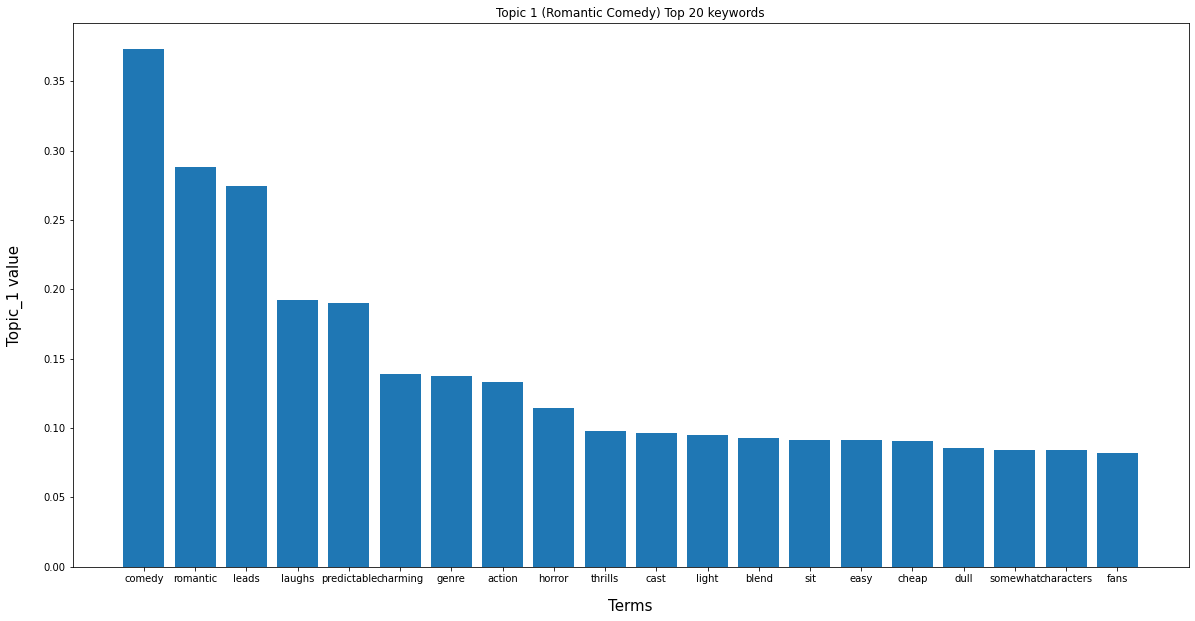

In [ ]:
plt.clf()
topic1_top20 = encoding_matrix.sort_values('topic_1', ascending=False).iloc[:20,:]
plt.bar(topic1_top20.index, topic1_top20["topic_1"])
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Terms', labelpad=15, fontdict={'size': 15})
plt.ylabel('Topic_1 value', labelpad=20, fontdict={'size': 15})
plt.xticks(fontsize='medium') 
plt.title('Topic 1 (Romantic Comedy) Top 20 keywords')
plt.show()

In [ ]:
encoding_matrix.sort_values('abs_topic_2', ascending=False).head(10)

,topic_1,topic_2,abs_topic_1,abs_topic_2
horror,0.11413,0.24623,0.11413,0.24623
genre,0.13734,0.23742,0.13734,0.23742
action,0.13329,0.22808,0.13329,0.22808
comedy,0.37325,-0.21559,0.37325,0.21559
thrills,0.09813,0.20963,0.09813,0.20963
romantic,0.28827,-0.18766,0.28827,0.18766
fans,0.08235,0.17756,0.08235,0.17756
offers,0.05177,0.14919,0.05177,0.14919
leads,0.27428,-0.14287,0.27428,0.14287
laughs,0.19241,-0.14097,0.19241,0.14097


In [ ]:
encoding_matrix.sort_values('topic_2', ascending=False).head(10)

,topic_1,topic_2,abs_topic_1,abs_topic_2
horror,0.11413,0.24623,0.11413,0.24623
genre,0.13734,0.23742,0.13734,0.23742
action,0.13329,0.22808,0.13329,0.22808
thrills,0.09813,0.20963,0.09813,0.20963
fans,0.08235,0.17756,0.08235,0.17756
offers,0.05177,0.14919,0.05177,0.14919
movies,0.05476,0.13556,0.05476,0.13556
fi,0.06250,0.13520,0.06250,0.13520
sci,0.06250,0.13520,0.06250,0.13520
thriller,0.06660,0.12986,0.06660,0.12986


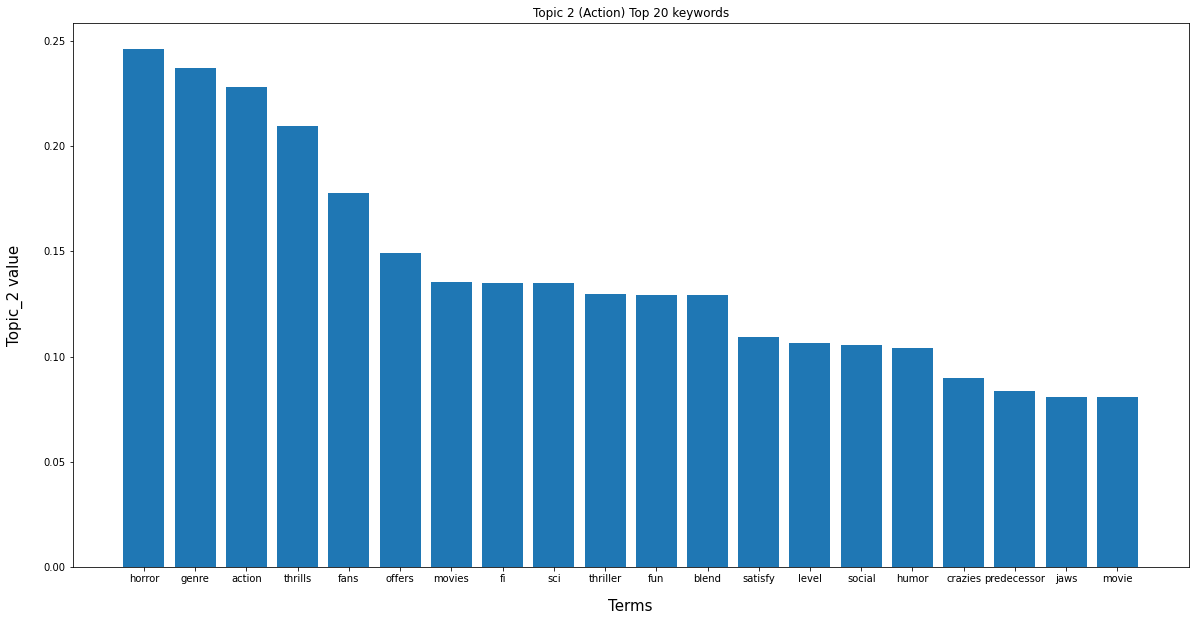

In [ ]:
topic2_top20 = encoding_matrix.sort_values('topic_2', ascending=False).iloc[:20,:]
plt.bar(topic2_top20.index, topic2_top20["topic_2"])
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Terms', labelpad=15, fontdict={'size': 15})
plt.ylabel('Topic_2 value', labelpad=20, fontdict={'size': 15})
plt.xticks(fontsize='medium') 
plt.title('Topic 2 (Action) Top 20 keywords')
plt.show()

# (CountVectorizer) LSA: **Visualization**

1
0


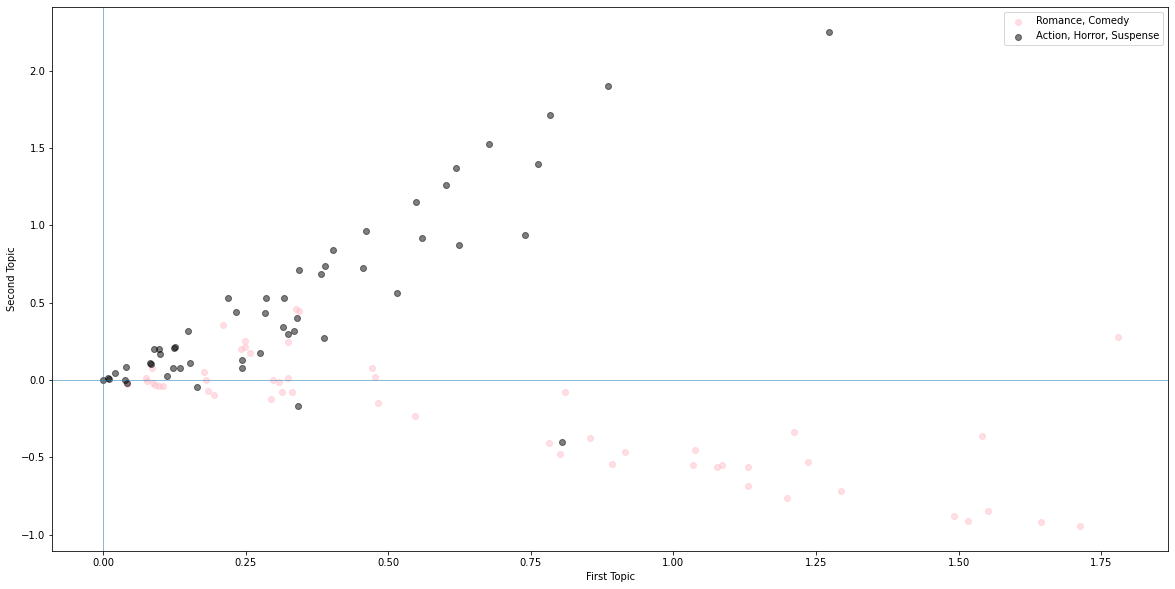

In [ ]:
fig, ax = plt.subplots()
 
for val in topic_encoded_df.Is_Romance.unique():
  topic_1 = topic_encoded_df[topic_encoded_df.Is_Romance == val]['topic_1'].values
  topic_2 = topic_encoded_df[topic_encoded_df.Is_Romance == val]['topic_2'].values
  print(val)
  color = "pink" if val else "black"
  label = "Romance, Comedy" if val else "Action, Horror, Suspense"
  ax.scatter(topic_1, topic_2, c=color, alpha=0.5, label=label)
# made the colors represent different classes
 
ax.set_xlabel('First Topic')
ax.set_ylabel('Second Topic')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()
 
# display(fig) <- we can erase it

# (CountVectorizer) LSA: **Evaluation**

In [ ]:
topic_encoded_df["predicted"]=np.where(topic_encoded_df['topic_1']>topic_encoded_df['topic_2'], 1, 0)
o=np.where(topic_encoded_df["Is_Romance"]==topic_encoded_df["predicted"])
x=np.where(topic_encoded_df["Is_Romance"]!=topic_encoded_df["predicted"])
total= len(o[0])+len(x[0])
# print("# of Matches:",  len(o[0]), len(o[0])/total, "%")
# print("# of Unmatches:",len(x[0]), len(x[0])/total, "% \n")

# print(round(len(o[0])/total *100,2), "% of LSA values correctly predicts")

y_pred_lsa = topic_encoded_df["predicted"].to_numpy()
y_test_lsa = topic_encoded_df["Is_Romance"].to_numpy()
print(classification_report(y_test_lsa, y_pred_lsa))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        53
           1       0.75      0.92      0.83        53

    accuracy                           0.81       106
   macro avg       0.83      0.81      0.81       106
weighted avg       0.83      0.81      0.81       106



# (TF-IDF) LSA 
for comparing with Countvectorizer

In [ ]:
tfidf_vec = TfidfVectorizer(min_df=1, stop_words='english')
bag_of_words = tfidf_vec.fit_transform(action_romcom.critics_consensus)
bag_of_words.todense()
print(bag_of_words[0])
print(bag_of_words.shape)

  (0, 370)	0.20365197483704658
  (0, 637)	0.2612996335394896
  (0, 205)	0.2612996335394896
  (0, 571)	0.2612996335394896
  (0, 549)	0.24002359793615038
  (0, 634)	0.1955632015081002
  (0, 235)	0.2612996335394896
  (0, 754)	0.24002359793615038
  (0, 583)	0.24002359793615038
  (0, 272)	0.24002359793615038
  (0, 0)	0.2612996335394896
  (0, 632)	0.24002359793615038
  (0, 743)	0.2612996335394896
  (0, 167)	0.13314196610744283
  (0, 67)	0.2612996335394896
  (0, 280)	0.2612996335394896
  (0, 83)	0.2612996335394896
(106, 979)


In [ ]:
svd = TruncatedSVD(n_components=2)
lsa_tfidf = svd.fit_transform(bag_of_words)

In [ ]:
topic_encoded_tfidf_df = pd.DataFrame(lsa_tfidf, columns = ["topic_1", "topic_2"])
topic_encoded_tfidf_df["sentence"] = action_romcom["critics_consensus"].values
topic_encoded_tfidf_df["genres"] = action_romcom["genres"].values
topic_encoded_tfidf_df["Is_Romance"]=action_romcom["genres"].str.contains("Romance", na=False).values
display(topic_encoded_tfidf_df)

,topic_1,topic_2,sentence,genres,Is_Romance
0,0.11325,-0.07187,Blake Edwards' bawdy comedy may not score a pe...,"Comedy, Romance",True
1,0.12868,-0.05504,"Matched by Garson Kanin's witty, sophisticated...","Classics, Comedy, Romance",True
2,0.22654,-0.16276,"The Baxter is good-natured, but there are simp...","Comedy, Romance",True
3,0.36886,-0.19728,"What Happens in Vegas has a few laughs, but mo...","Comedy, Romance",True
4,0.05884,-0.01408,Sandra Bullock and Ryan Reynolds exhibit plent...,"Comedy, Romance",True
...,...,...,...,...,...
101,0.14016,0.25108,Train to Busan delivers a thrillingly unique -...,"Action & Adventure, Art House & International,...",False
102,0.08074,0.06340,"A visual and aural assault on the senses, this...","Action & Adventure, Horror, Mystery & Suspense...",False
103,0.07805,0.10911,"Woefully deficient in thrills or common sense,...","Action & Adventure, Horror, Mystery & Suspense...",False
104,0.00156,-0.01414,"Though Wolf Creek is effectively horrific, it ...","Action & Adventure, Horror, Mystery & Suspense",False


# (TF-IDF) LSA: **Dictionary and Encoding Matrix Details**

## Dictionary

In [ ]:
dictionary = tfidf_vec.get_feature_names()
len(dictionary) 
type(dictionary)
dictionary[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10',
 '13',
 '1980s',
 '27',
 '30',
 '90s',
 'abraham',
 'absurdity',
 'abyss',
 'accidental']

## Encoding Matrix

In [ ]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=["topic_1", "topic_2"],
                               columns=dictionary).T
# encoding_matrix = pd.DataFrame(svd.components_,
#                                index=["topic_1", "topic_2"],).T
# encoding_matrix["term"]= dictionary                               
encoding_matrix

,topic_1,topic_2
10,0.01016,-0.01029
13,0.00627,-0.00486
1980s,0.01743,0.02078
27,0.02835,-0.02472
30,0.00627,-0.00486
...,...,...
year,0.01160,0.01190
young,0.02717,0.01446
zellweger,0.02574,-0.01429
zombie,0.02881,0.07012


In [ ]:
# generate rows of abs since the positive and negative values are equally important
encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
encoding_matrix.sort_values('topic_1', ascending=False).head(10)

,topic_1,topic_2,abs_topic_1,abs_topic_2
comedy,0.37325,-0.21559,0.37325,0.21559
romantic,0.28827,-0.18766,0.28827,0.18766
leads,0.27428,-0.14287,0.27428,0.14287
laughs,0.19241,-0.14097,0.19241,0.14097
predictable,0.18986,-0.12704,0.18986,0.12704
charming,0.13874,-0.06702,0.13874,0.06702
genre,0.13734,0.23742,0.13734,0.23742
action,0.13329,0.22808,0.13329,0.22808
horror,0.11413,0.24623,0.11413,0.24623
thrills,0.09813,0.20963,0.09813,0.20963


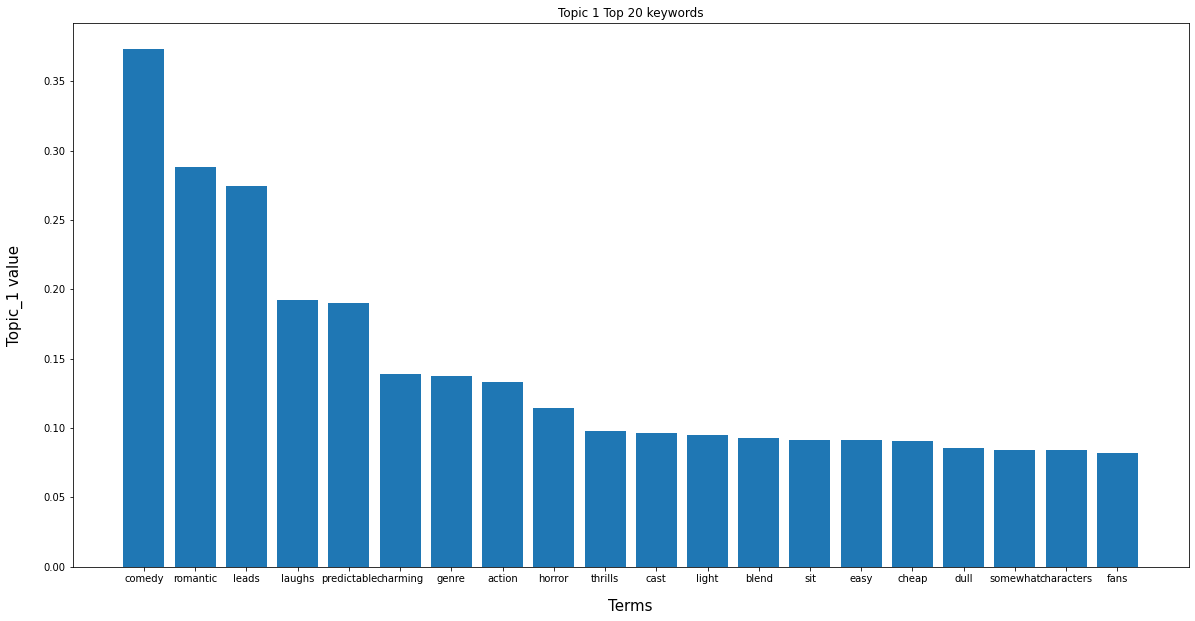

In [ ]:
topic1_top20 = encoding_matrix.sort_values('topic_1', ascending=False).iloc[:20,:]
plt.bar(topic1_top20.index, topic1_top20["topic_1"])
plt.rcParams["figure.figsize"] = (20,10)
# plt.xticks(x, years)
plt.xlabel('Terms', labelpad=15, fontdict={'size': 15})
plt.ylabel('Topic_1 value', labelpad=20, fontdict={'size': 15})
plt.xticks(fontsize='medium') 
plt.title('Topic 1 Top 20 keywords')
plt.show()

In [ ]:
encoding_matrix.sort_values('topic_2', ascending=False).head(10)

,topic_1,topic_2,abs_topic_1,abs_topic_2
horror,0.11413,0.24623,0.11413,0.24623
genre,0.13734,0.23742,0.13734,0.23742
action,0.13329,0.22808,0.13329,0.22808
thrills,0.09813,0.20963,0.09813,0.20963
fans,0.08235,0.17756,0.08235,0.17756
offers,0.05177,0.14919,0.05177,0.14919
movies,0.05476,0.13556,0.05476,0.13556
fi,0.06250,0.13520,0.06250,0.13520
sci,0.06250,0.13520,0.06250,0.13520
thriller,0.06660,0.12986,0.06660,0.12986


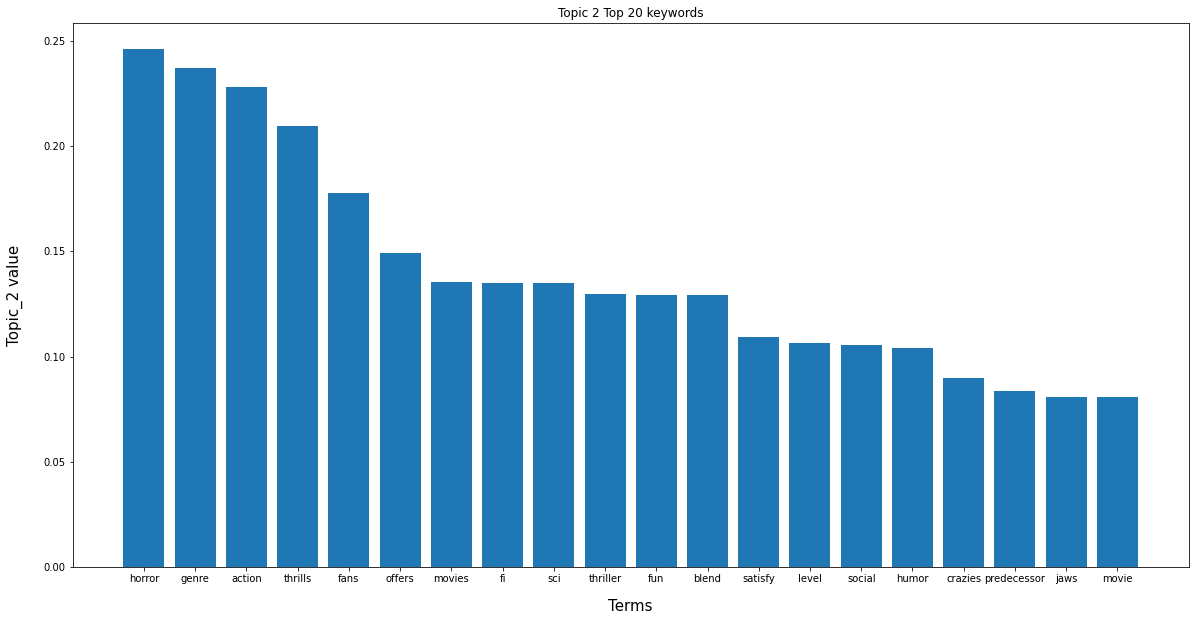

In [ ]:
topic2_top20 = encoding_matrix.sort_values('topic_2', ascending=False).iloc[:20,:]
plt.bar(topic2_top20.index, topic2_top20["topic_2"])
plt.rcParams["figure.figsize"] = (20,10)
# plt.xticks(x, years)
plt.xlabel('Terms', labelpad=15, fontdict={'size': 15})
plt.ylabel('Topic_2 value', labelpad=20, fontdict={'size': 15})
plt.xticks(fontsize='medium') 
plt.title('Topic 2 Top 20 keywords')
plt.show()

# (TF-IDF) LSA: **Visualization**

True
False


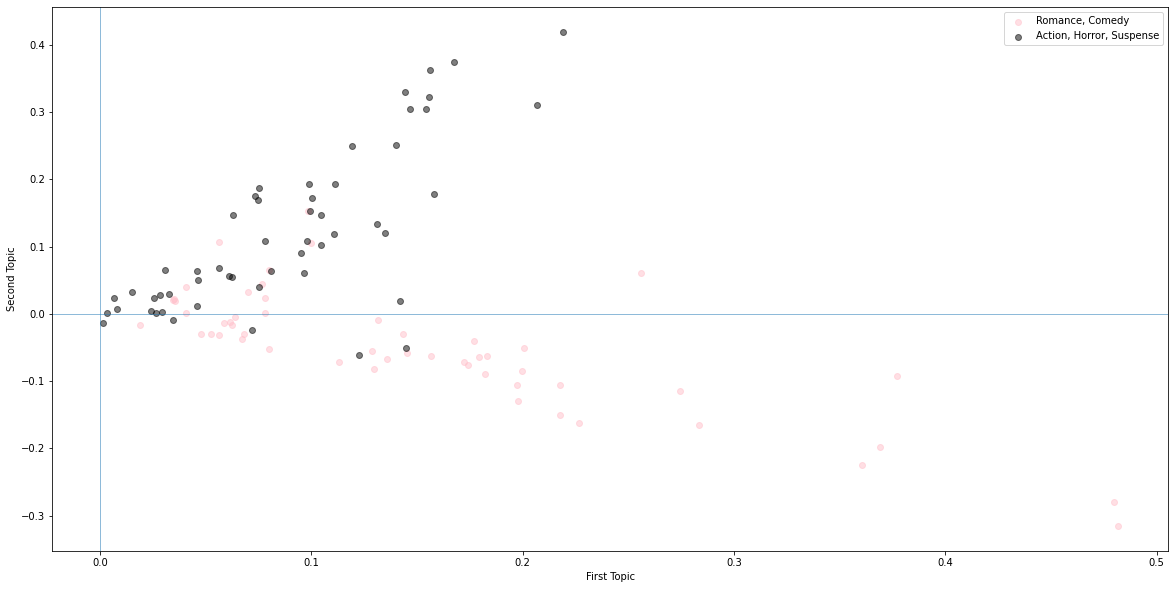

In [ ]:
fig, ax = plt.subplots()
 
for val in topic_encoded_tfidf_df.Is_Romance.unique():
  topic_1 = topic_encoded_tfidf_df[topic_encoded_tfidf_df.Is_Romance == val]['topic_1'].values
  topic_2 = topic_encoded_tfidf_df[topic_encoded_tfidf_df.Is_Romance == val]['topic_2'].values
  print(val)
  color = "pink" if val else "black"
  label = "Romance, Comedy" if val else "Action, Horror, Suspense"
  ax.scatter(topic_1, topic_2, c=color, alpha=0.5, label=label)
 
ax.set_xlabel('First Topic')
ax.set_ylabel('Second Topic')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

# (TF_IDF) LSA: **Evaluation**

In [ ]:
topic_encoded_tfidf_df["predicted"]=np.where(topic_encoded_tfidf_df['topic_1']>topic_encoded_tfidf_df['topic_2'], 1, 0)
# print(topic_encoded_df.head(10))

o=np.where(topic_encoded_tfidf_df["Is_Romance"]==topic_encoded_tfidf_df["predicted"])
x=np.where(topic_encoded_tfidf_df["Is_Romance"]!=topic_encoded_tfidf_df["predicted"])
total= len(o[0])+len(x[0])
# print("# of Matches:",  len(o[0]), len(o[0])/total, "%")
# print("# of Unmatches:",len(x[0]), len(x[0])/total, "%")
# print(round(len(o[0])/total *100,2), "% of LSA values correctly predicts")

y_pred_tfidf = topic_encoded_tfidf_df["predicted"].to_numpy()
y_test_tfidf = topic_encoded_tfidf_df["Is_Romance"].to_numpy()
print(classification_report(y_test_tfidf, y_pred_tfidf))

              precision    recall  f1-score   support

       False       0.91      0.57      0.70        53
        True       0.68      0.94      0.79        53

    accuracy                           0.75       106
   macro avg       0.80      0.75      0.75       106
weighted avg       0.80      0.75      0.75       106



# Compare (CountVectorizer) and (TF_IDF) LSA

Despite both of topic_1 values and topic_2 values slightly different for CountVectorizer and TF-IDF, the prediction came out to be the same because the differnce wasn't high for the prediction to be flipped

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


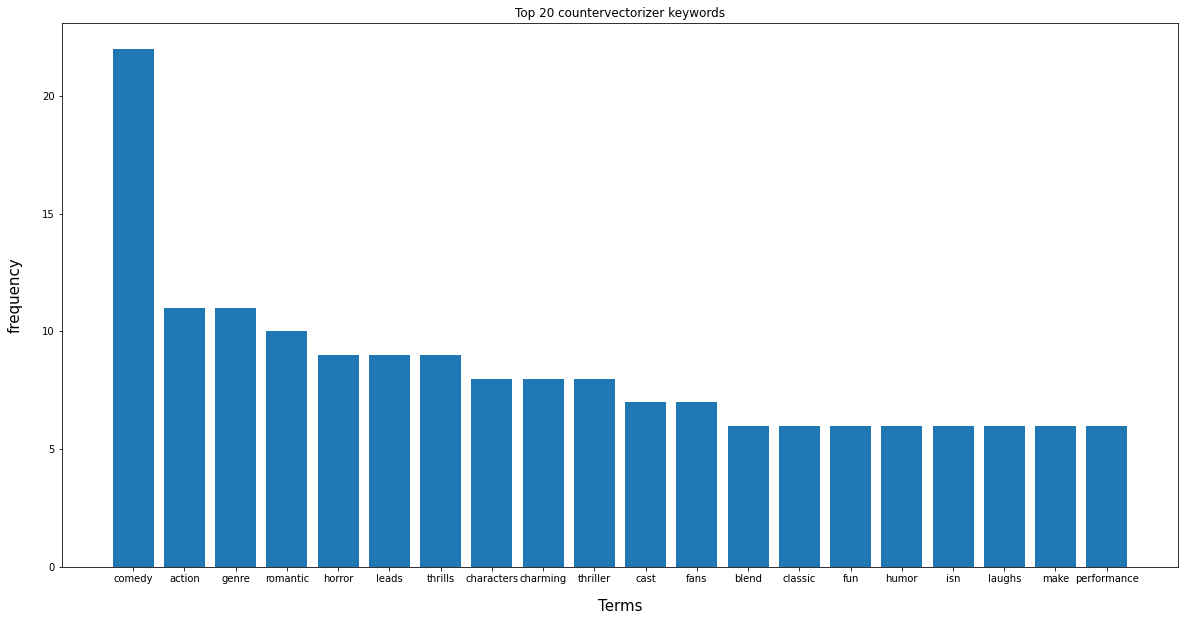

In [ ]:
# get 20 most frequent terms
# are these dominant terms determin the classes?

countervec_freq = sorted(list(zip(count_vec.get_feature_names(), bag_of_words_count.sum(0).getA1())),
                         key=lambda bag_of_words_count: bag_of_words_count[1], reverse=True)[:20]

terms, frequency = zip(*countervec_freq)

plt.bar(terms, frequency)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Terms', labelpad=15, fontdict={'size': 15})
plt.ylabel('frequency', labelpad=20, fontdict={'size': 15})
plt.xticks(fontsize='medium') 
plt.title('Top 20 countervectorizer keywords')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


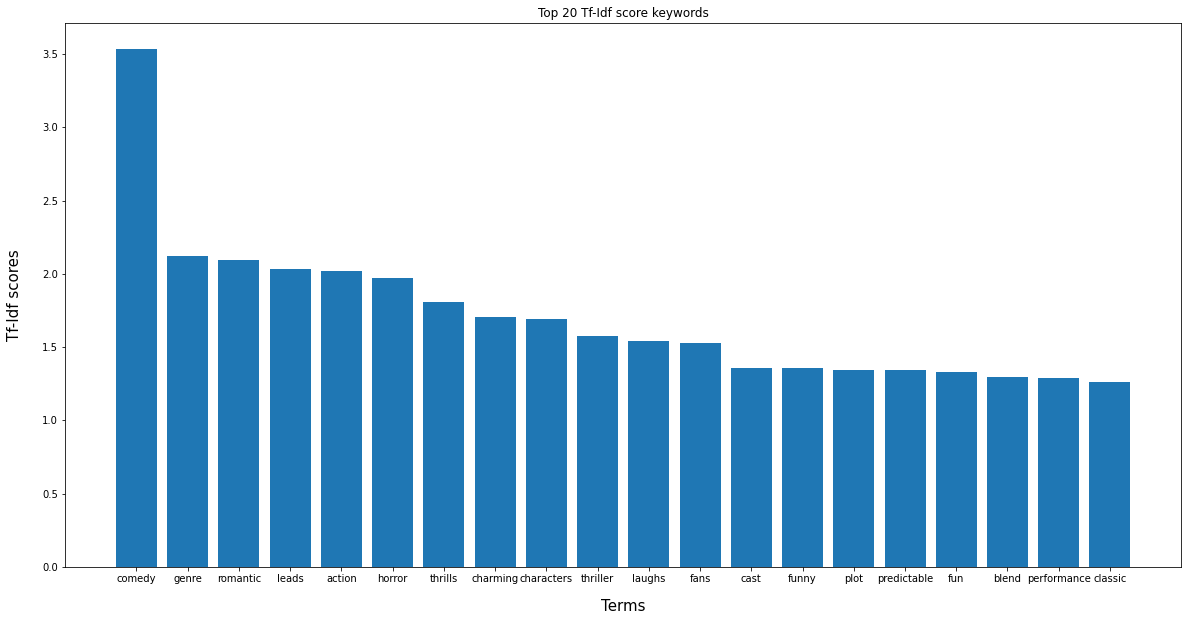

In [ ]:
tfidf_scores = sorted(list(zip(tfidf_vec.get_feature_names(), bag_of_words.sum(0).getA1())),
                      key=lambda bag_of_words: bag_of_words[1], reverse=True)[:20]

terms, tfidfscore = zip(*tfidf_scores)

plt.bar(terms, tfidfscore)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Terms', labelpad=15, fontdict={'size': 15})
plt.ylabel('Tf-Idf scores', labelpad=20, fontdict={'size': 15})
plt.xticks(fontsize='medium') 
plt.title('Top 20 Tf-Idf score keywords')
plt.show()

In [ ]:
compare = pd.DataFrame()

compare["count(topic_1)"]=topic_encoded_df["topic_1"]
compare["tfidf(topic_1)"]=topic_encoded_tfidf_df["topic_1"]
compare["Difference(topic_1)"]=compare["count(topic_1)"]-compare["tfidf(topic_1)"] #countvectorizer values are bit more dramatic 
compare["count(topic_2)"]=topic_encoded_df["topic_2"]
compare["tfidf(topic_2)"]=topic_encoded_tfidf_df["topic_2"]
compare["Difference(topic_2)"]=compare["count(topic_2)"]-compare["tfidf(topic_2)"]

compare

,count(topic_1),tfidf(topic_1),Difference(topic_1),count(topic_2),tfidf(topic_2),Difference(topic_2)
0,1.03447,0.13398,0.90049,-0.55144,-0.07061,-0.48083
1,1.03861,0.12803,0.91057,-0.45070,-0.05912,-0.39157
2,0.80111,0.22594,0.57517,-0.47994,-0.14369,-0.33625
3,1.64536,0.36997,1.27538,-0.92025,-0.19258,-0.72767
4,0.17707,0.05345,0.12362,0.05142,0.01856,0.03286
...,...,...,...,...,...,...
101,0.78395,0.13543,0.64851,1.71309,0.25914,1.45395
102,0.32414,0.07668,0.24746,0.30112,0.06299,0.23813
103,0.28342,0.07650,0.20692,0.43371,0.10160,0.33211
104,0.00000,-0.00161,0.00161,0.00000,0.00447,-0.00447


In [ ]:
compare.describe()

,count(topic_1),tfidf(topic_1),Difference(topic_1),count(topic_2),tfidf(topic_2),Difference(topic_2)
count,106.00000,106.00000,106.00000,106.00000,106.00000,106.00000
mean,0.49862,0.11824,0.38038,0.14520,0.03539,0.10981
std,0.45026,0.09322,0.37117,0.59367,0.13473,0.47433
min,0.00000,-0.00161,0.00161,-0.94409,-0.30917,-0.74481
25%,0.15588,0.05066,0.09823,-0.09347,-0.04422,-0.06311
50%,0.32778,0.09462,0.23866,0.07791,0.01423,0.05569
75%,0.77696,0.15528,0.57619,0.35429,0.09892,0.24089
max,1.77916,0.48536,1.52986,2.25162,0.41576,2.11036


<Figure size 1440x720 with 0 Axes>

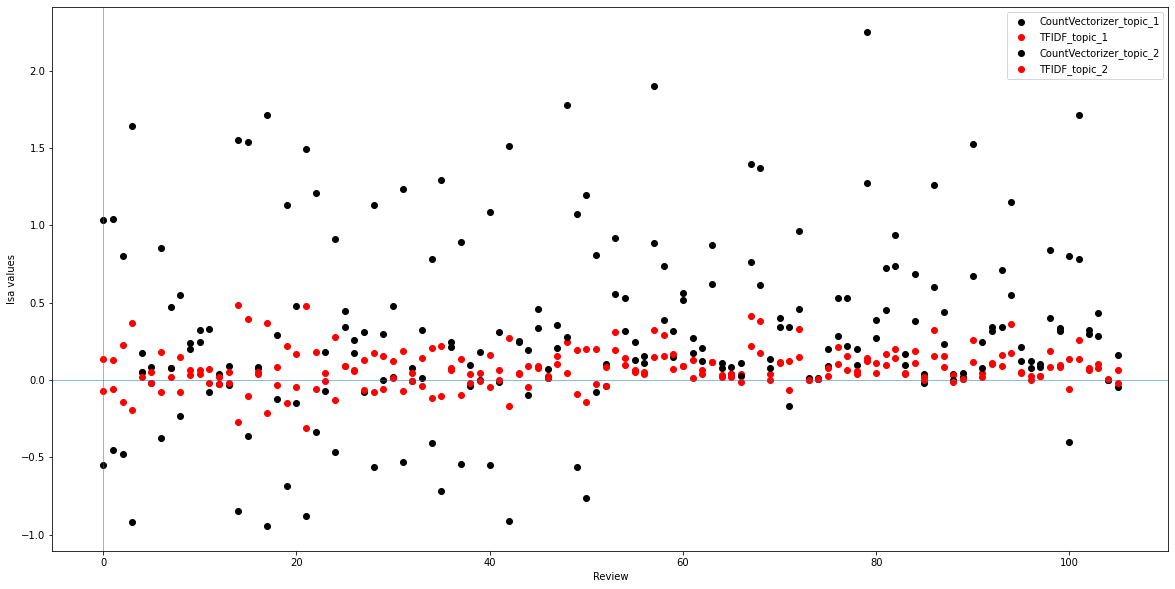

In [ ]:
plt.clf()

fig, ax = plt.subplots()

topic_1_count = compare["count(topic_1)"].values
topic_1_tfidf = compare["tfidf(topic_1)"].values
topic_2_count = compare["count(topic_2)"].values
topic_2_tfidf = compare["tfidf(topic_2)"].values

plt.scatter(compare.index,topic_1_count, color='black', label="CountVectorizer_topic_1") 
plt.scatter(compare.index,topic_1_tfidf, color='red', label="TFIDF_topic_1") 
plt.scatter(compare.index,topic_2_count, color='black', label="CountVectorizer_topic_2") 
plt.scatter(compare.index,topic_2_tfidf, color='red', label="TFIDF_topic_2") 

ax.set_xlabel('Review')
ax.set_ylabel('lsa values')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

In [ ]:
compare = pd.DataFrame()

compare["count(topic_1)"]=np.abs(topic_encoded_df["topic_1"])
compare["tfidf(topic_1)"]=np.abs(topic_encoded_tfidf_df["topic_1"])
compare["Difference(topic_1)"]=compare["count(topic_1)"]-compare["tfidf(topic_1)"]
compare["count(topic_2)"]=np.abs(topic_encoded_df["topic_2"])
compare["tfidf(topic_2)"]=np.abs(topic_encoded_tfidf_df["topic_2"])
compare["Difference(topic_2)"]=compare["count(topic_2)"]-compare["tfidf(topic_2)"]

### Valuable Insight: Chi2 Feature Selection

In [ ]:
tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 1))
X_tfidf = tfidf.fit_transform(topic_encoded_df.review)
y = topic_encoded_df.Is_Romance
chi2score = chi2(X_tfidf, y)[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


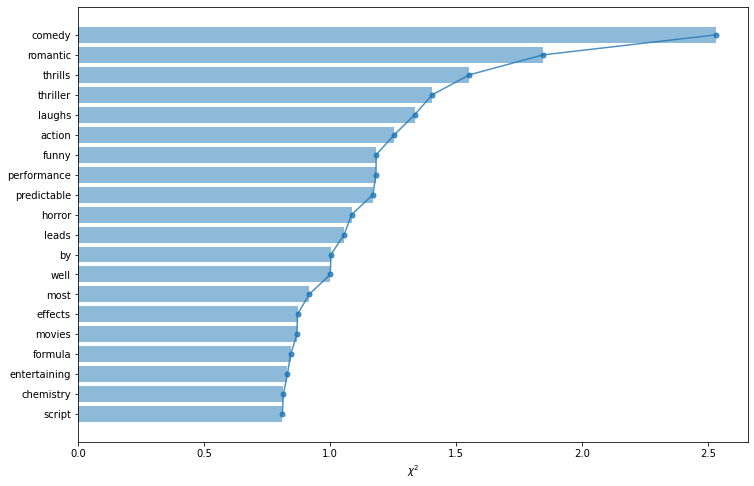

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

The features with a high χ2 can be considered relevant for the review we analyze.
For example, the top 5 most useful feature selected by Chi-square test are “comedy", “romantic”, “romantic-comedy”, “thrills” and “thriller”. They are the words that each distinctly covers two different generes that we chose. Some of the words that are less confined to each genere, such as "well" and "movies"  follow after the core words.

# Classification by Support Vector Machine

## Support Vector Machine - 1 ( with non-params )

In [ ]:
# dataset reorganize and convert labels into [1:Romcom & 0:Action]
movies_svm = topic_encoded_df.copy()
movies_svm.drop(["topic_1", "topic_2", "genres"], axis=1, inplace=True)
movies_svm["Is_Romance"].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
101    0
102    0
103    0
104    0
105    0
Name: Is_Romance, Length: 106, dtype: int64

In [ ]:
#data split
X = bag_of_words.copy()
y = movies_svm["Is_Romance"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#train data
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [ ]:
#evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.80      0.75      0.77        16

    accuracy                           0.78        32
   macro avg       0.78      0.78      0.78        32
weighted avg       0.78      0.78      0.78        32



## Support Vector Machine - 2 ( using GridsearchCV for better parameters )

In [ ]:
#dataset reorganize
movies_svm = movies_svm.sample(frac=1).reset_index(drop=True)
svm_train = movies_svm.iloc[:80,:]
svm_test = movies_svm.iloc[80:,:]

train_review = svm_train["review"].tolist()
train_romance = svm_train["Is_Romance"].tolist()
test_review = svm_test["review"].tolist()
test_romance = svm_test["Is_Romance"].tolist()

In [ ]:
#run gridsearchcv
def search_params(train_review, train_in_romance):
    #pipeline
    text_clf = Pipeline([("tfidf", TfidfVectorizer()),
                     ("clf", svm.LinearSVC())])
    #ranges of parameters for GridSearchCV
    parameters = {"tfidf__use_idf":[True, False],
                 "tfidf__ngram_range":[(1,1),(1,2),(1,3)],   #n_grams,
                 "tfidf__stop_words":[None, "english"],   #exclude unnecessary words
                  "tfidf__min_df":[1, 3, 5],  #minimum frequency in documents
                  "clf__C":[0.1, 0.5, 1, 2]}   #lower C param : softer margin, higher C param : harder margin
    metric = "f1_macro"
    gs_clf = GridSearchCV(text_clf, param_grid=parameters, refit=True, 
                          scoring=metric, cv=10)
    gs_clf.fit(train_review, train_in_romance)
    best_param = gs_clf.best_params_
    best_score = gs_clf.best_score_
    return [best_param, best_score]

In [ ]:
best_params = search_params(train_review, train_romance)

In [ ]:
#print best parameters for the svm model
best_parameters = best_params[0]
for param in best_parameters:
    print("{0}:\t{1}".format(param, best_parameters[param]))

print("best f1-score: {:.3%}".format(best_params[1]))

clf__C:	2
tfidf__min_df:	1
tfidf__ngram_range:	(1, 3)
tfidf__stop_words:	english
tfidf__use_idf:	True
best f1-score: 85.944%


In [ ]:
# assign best parameters
dtm_options = {}; svm_options = {}
svm_options["C"] = best_params[0]["clf__C"]
dtm_options['min_df'] = best_params[0]["tfidf__min_df"]
dtm_options["ngram_range"] = best_params[0]["tfidf__ngram_range"]
dtm_options["stop_words"] = best_params[0]["tfidf__stop_words"]
dtm_options["use_idf"] = best_params[0]["tfidf__use_idf"]

## Support Vector Machine - 3 ( with params )

In [ ]:
def svm_params(dtm_options, svm_options):
  tfidf_vect = TfidfVectorizer(stop_words=dtm_options["stop_words"], 
                                 min_df=dtm_options["min_df"], 
                                 use_idf=dtm_options["use_idf"], 
                                 ngram_range=dtm_options["ngram_range"])
  dtm = tfidf_vect.fit_transform(svm_train["review"])

  # data split
  X_train = dtm
  y_train = svm_train["Is_Romance"]
  X_test = tfidf_vect.transform(svm_test["review"])
  y_test = svm_test["Is_Romance"]

  # train data
  clf = svm.LinearSVC(C=svm_options["C"])
  clf.fit(X_train, y_train)

  # prediction result
  y_pred = clf.predict(X_test)
  report = classification_report(y_test, y_pred)
  return report

In [ ]:
svm_params_report = svm_params(dtm_options = dtm_options, svm_options = svm_options)
print(svm_params_report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.87      0.87      0.87        15

    accuracy                           0.85        26
   macro avg       0.84      0.84      0.84        26
weighted avg       0.85      0.85      0.85        26



## Conclusion

F-1 score of CountVectorizer LSA: 81%

F-1 score of TFIDF LSA: 75%

F-1 score of SVM w/o Parameter (F1 score): 78%

F-1 score of SVM w/ parameters (F1 score): 85%



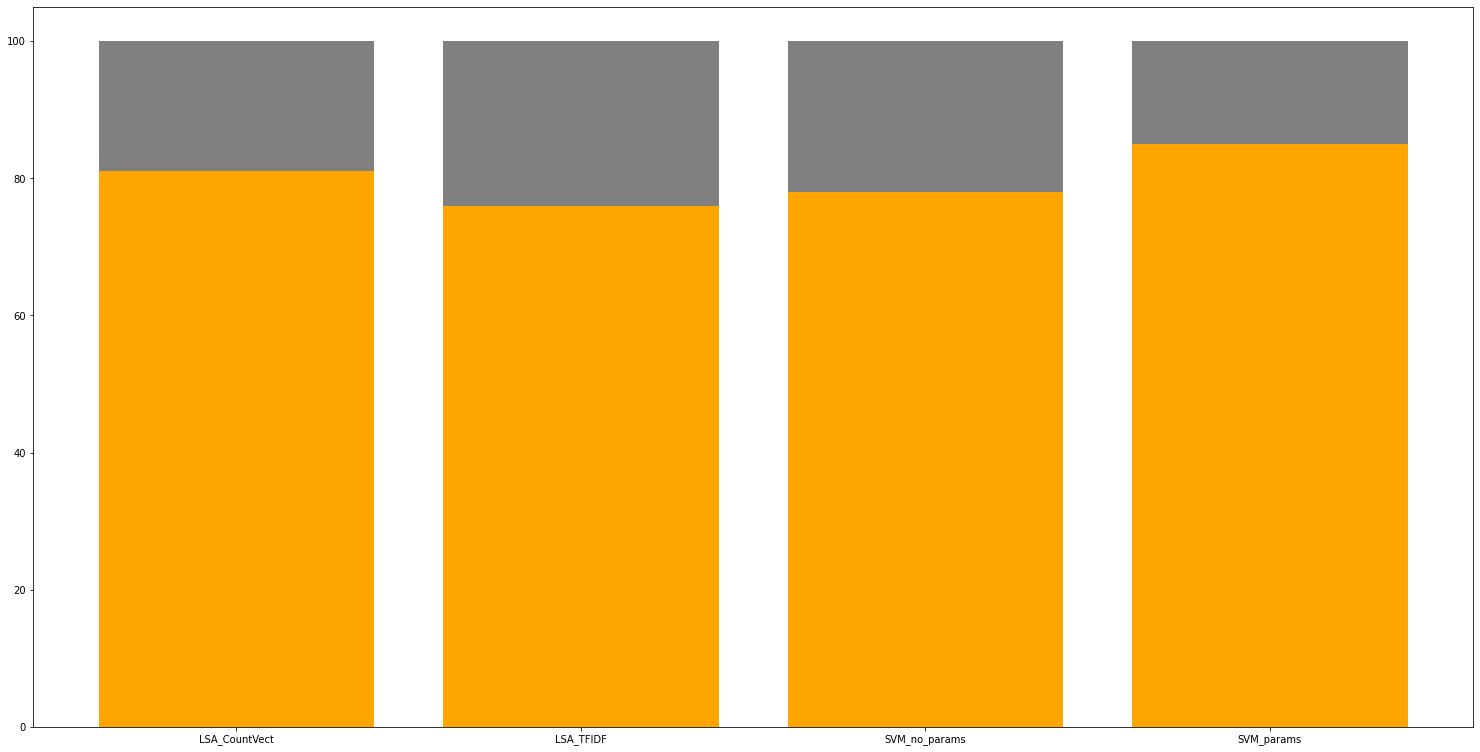

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
acc = ['LSA_CountVect', 'LSA_TFIDF', 'SVM_no_params', 'SVM_params']
methods = [81,76,78,85]
total=[100]*4
ax.bar(acc,total, color='grey')
ax.bar(acc,methods, color="orange")
plt.show()